In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/1729258-1613615-Stock_Price_data_set_(1).csv");

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
# Check if there is any null value present or not

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [ ]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,9,2,2018


In [ ]:
# We can see that 'Close' and 'Adj Close' these two colums are same so we can eliminate one of them

df.drop('Adj Close', axis = 1, inplace = True)
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year
0,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018
1,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018
2,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018
3,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018
4,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018


In [ ]:
# Predict Tomorrow Price

df['Tomorrow'] = df['Close'].shift(-1)

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,Tomorrow
0,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,265.720001
1,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,264.559998
2,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,250.100006
3,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,249.470001
4,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,257.950012


<Axes: >

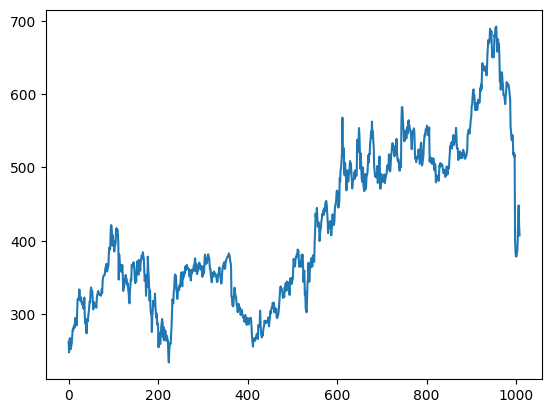

In [ ]:
df['Open'].plot()

<Axes: >

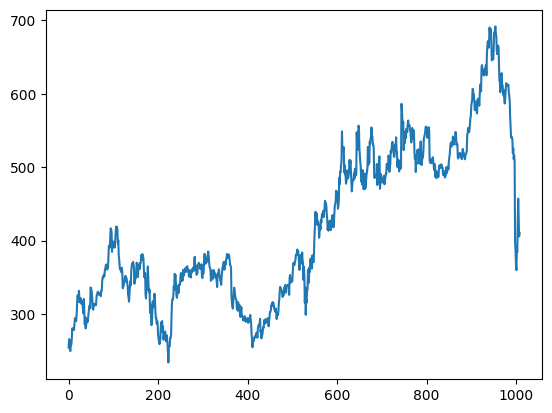

In [ ]:
df['Close'].plot()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

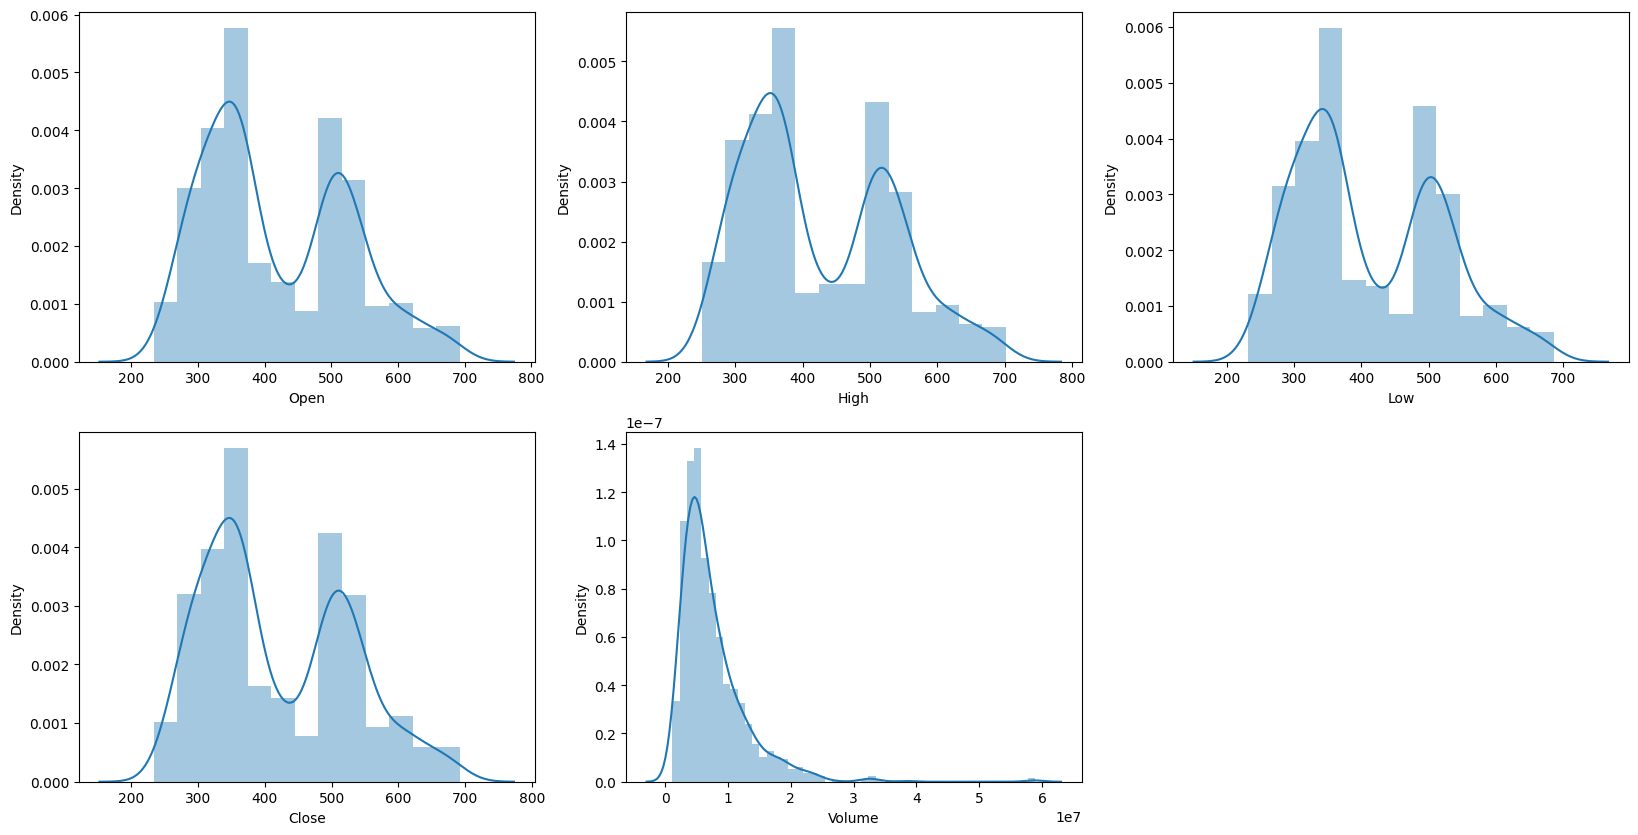

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

In [ ]:
df['is_quarter'] = np.where(df['Month']%3==0,1,0)
df.head()

,Open,High,Low,Close,Volume,Day,Month,Year,Tomorrow,is_quarter
0,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,265.720001,0
1,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,264.559998,0
2,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,250.100006,0
3,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,249.470001,0
4,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,257.950012,0


In [ ]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Day           0
Month         0
Year          0
Tomorrow      1
is_quarter    0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Day           0
Month         0
Year          0
Tomorrow      0
is_quarter    0
dtype: int64

# **Machine Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split as tts

features = df[['Open', 'Close','Low', 'High']]
target = df['Tomorrow']

x_train, x_test, y_train, y_test = tts(features, target, test_size = 0.1, random_state = 69)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(907, 4)
(101, 4)
(907,)
(101,)


In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(y_true, y_pred))

def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
metrics(y_test, y_pred)

RMSE: 16.734425439242532
R_Squared value: 0.9769462438421179


In [ ]:
regression_lr = accuracy(y_test, y_pred)
regression_lr

97.83566542152354

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 500, min_samples_split = 3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [ ]:
pred_rf = model_random_forest.predict(x_test)

In [ ]:
metrics(y_test, pred_rf)

RMSE: 17.587702215464716
R_Squared value: 0.974535316005642


In [ ]:
random_lr = accuracy(y_test, pred_rf)
random_lr

97.56954468872618

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

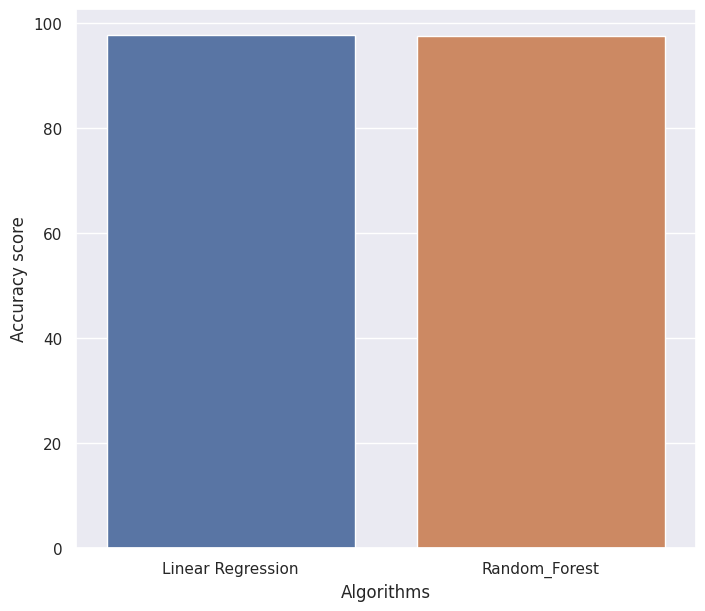

In [ ]:
scores = [regression_lr,random_lr]
algorithms = ["Linear Regression", "Random_Forest"]

sns.set(rc={'figure.figsize':(8,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)